In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

#Trying for test
data= pd.read_csv(r"/kaggle/input/binary-buzz-cyber-labs-ml-25/train.csv")
y_total = (data.target).values.reshape(-1,1) #Outputs to learn from
#The reshape is since this will make it from (m,) to (m,1)

m= int(len(y_total)*0.8) #Number of rows
x = data.iloc[:m, 1:-1] #Doesn't consider last column since that is y AND doesn't consider the ID column
xs= ((x-x.mean())/x.std()).values #Z-score Feature Scaling
#Do .values since pandas alligns by column name and gives error
w= (np.random.randn(xs.shape[1],1)).reshape(-1,1) #Parameters
b=0
alpha=0.09
J_history=[]
y= y_total[:m]
lamb = 3


In [2]:
for i in range(8000): #Number of Epochs
    fx=xs @ w+b
    fy= 1/(1+np.exp(-fx)) #SIGMOID Function
    L= -y*np.log(np.abs(fy)+1e-6)-(1-y)*np.log(np.abs(1-fy)+1e-6) #Log can be zero so add an "epsilon", i.e. a small value
    J= L.sum()/m + lamb * np.sum(w**2)/m
    J_history.append(J)
    tmpw= w-alpha*(xs.T @ (fy-y) + 2*lamb* w)/m #(w= w-a*dw) and dw here is the DERIVATIVE of J with respect to w. We have done regularisation here
    tmpb= b- alpha*(fy-y).sum()/m #(w= w-a*db) and db here is the DERIVATIVE of J with respect to b
    w= tmpw
    b= tmpb
    if i%1000==0:
      print(i)


0
1000
2000
3000
4000
5000
6000
7000


In [3]:
#Testing Accuracy
x_test = data.iloc[m:, 1:-1]
xs_test= ((x_test-x.mean())/x.std()).values #Use old values from model for mean and std
fx_test= xs_test @ w+b
fy_test= 1/(1+np.exp(-fx_test))
pred= (fy_test>=0.5)  #True=1,False=0
accuracy = np.mean(pred == y_total[m:])
print(accuracy*100,"is your accuracy")


88.25 is your accuracy


In [4]:
data_t= pd.read_csv(r"/kaggle/input/binary-buzz-cyber-labs-ml-25/test.csv")
data_test= data_t.iloc[:, 1:]
id= data_t.iloc[:,:1]
m1= len(data_test) #Number of rows
xs_test= ((data_test-x.mean())/x.std()).values #Use old values from model for mean and std
fx_test= xs_test @ w+b
fy_test= 1/(1+np.exp(-fx_test))
pred= fy_test>=0.5  #True=1,False=0


In [5]:
submission = pd.DataFrame()
target_column_name = 'target'
id_column_name= "id"
submission[id_column_name]= id
submission[target_column_name] = pred.flatten().astype(int)
submission.to_csv('submission.csv', index=False)

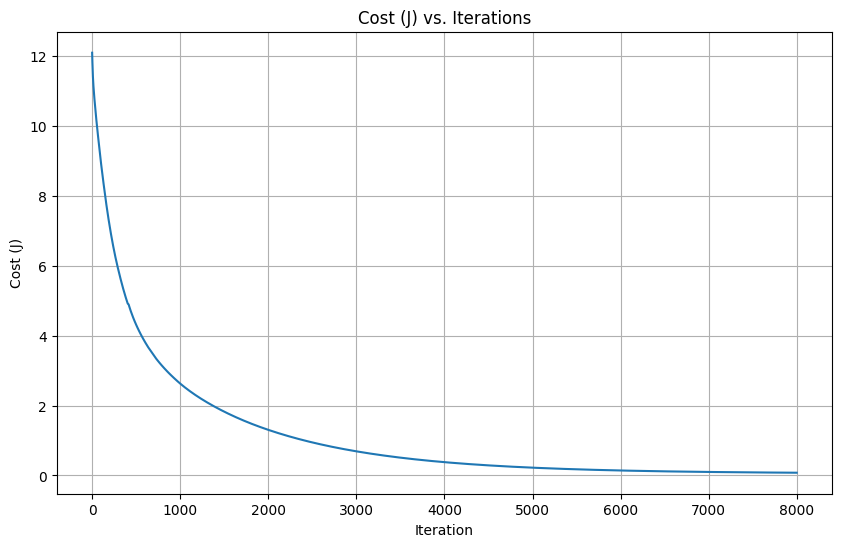

2nd


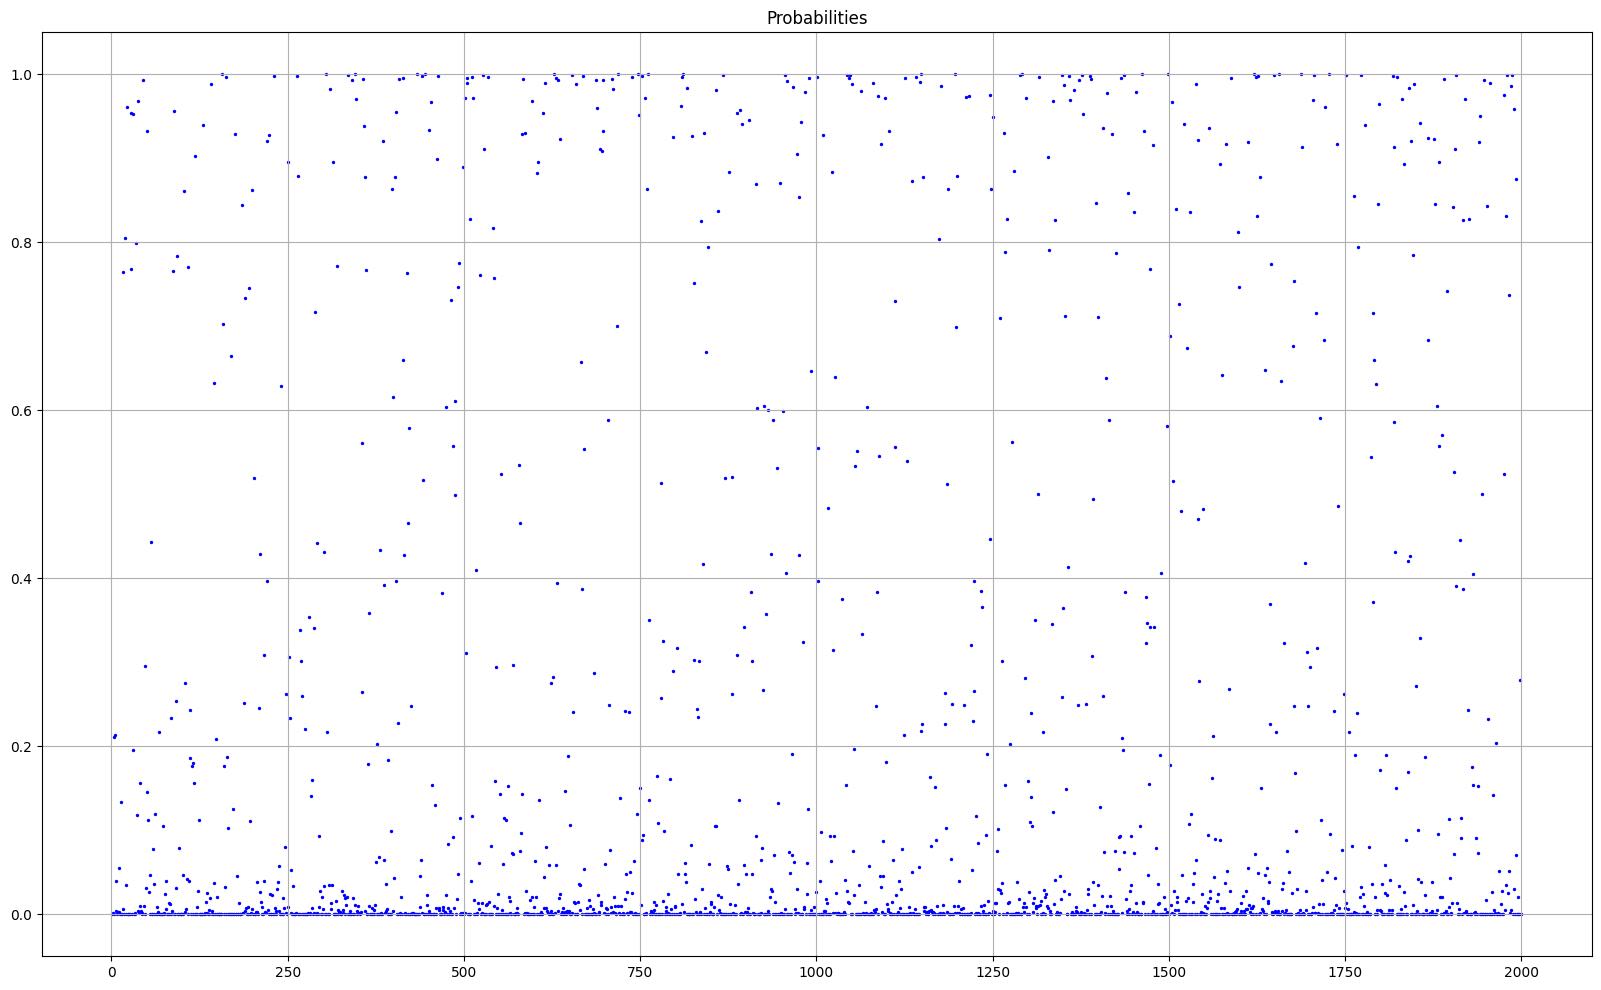

3rd


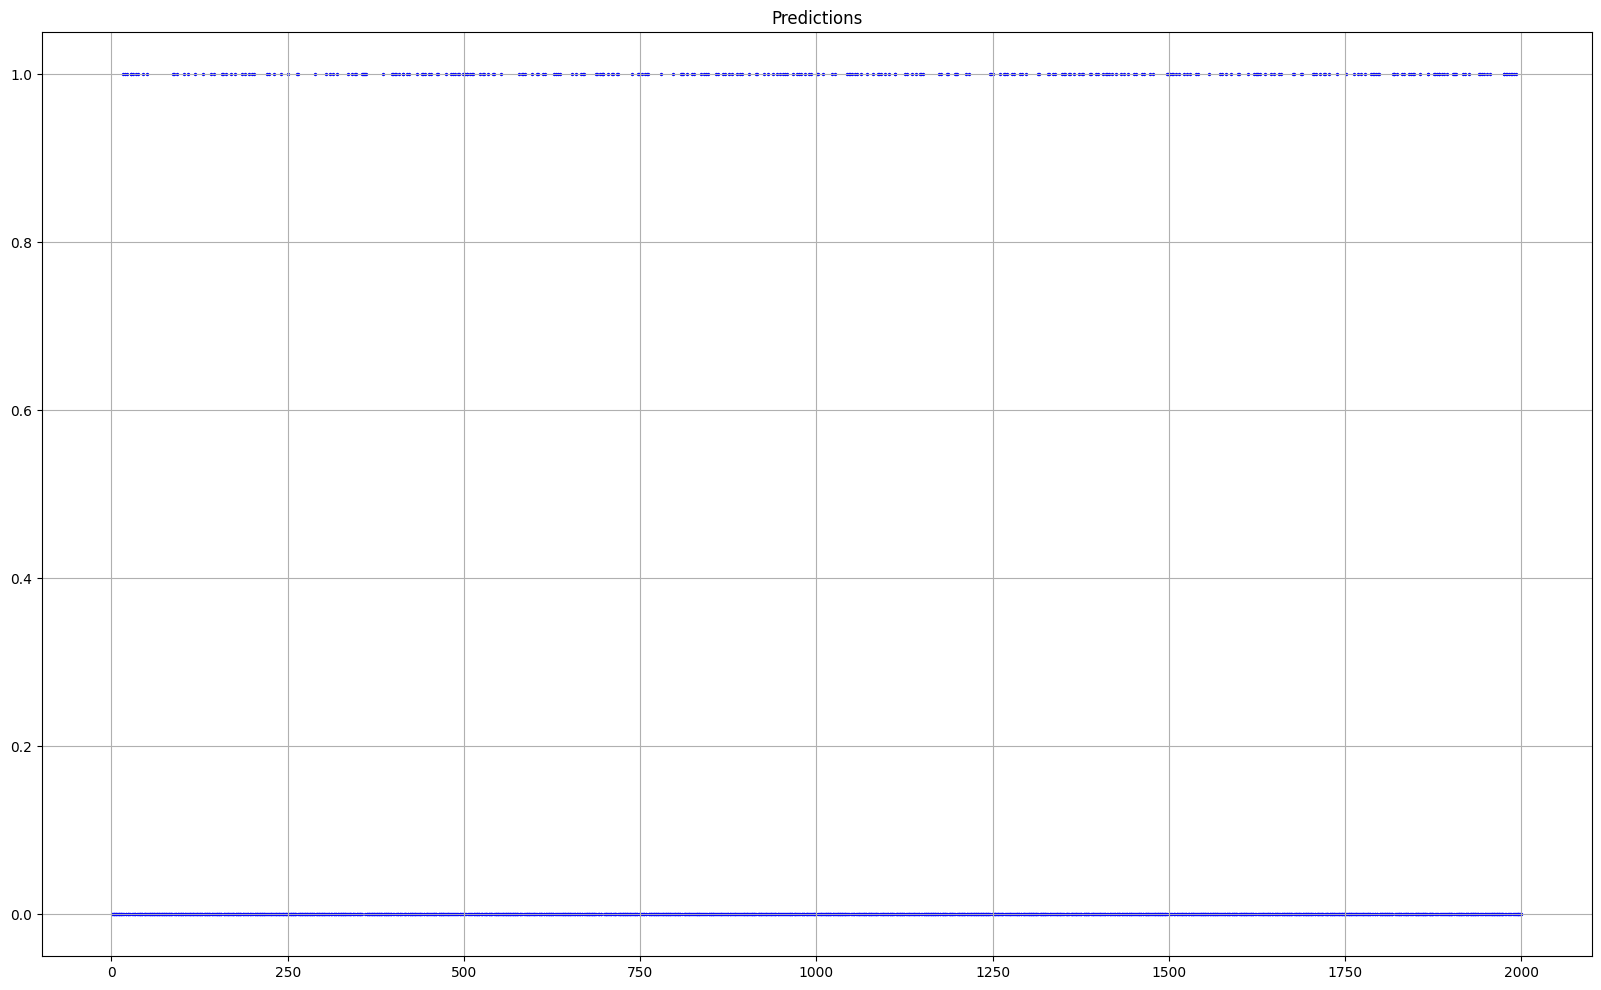

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(J_history)
plt.title("Cost (J) vs. Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost (J)")
plt.grid(True)
plt.show()
print("2nd")
plt.figure(figsize=(20, 12))
plt.scatter(range(1,m1+1),fy_test,color='blue',marker='o',s=2)
plt.title("Probabilities")
plt.grid(True)
plt.show()
print("3rd")
plt.figure(figsize=(20, 12))
plt.scatter(range(1,m1+1),pred,color='blue',marker='o',s=2)
plt.title("Predictions")
plt.grid(True)
plt.show()